In [1]:
import pandas as pd
import seaborn as sns

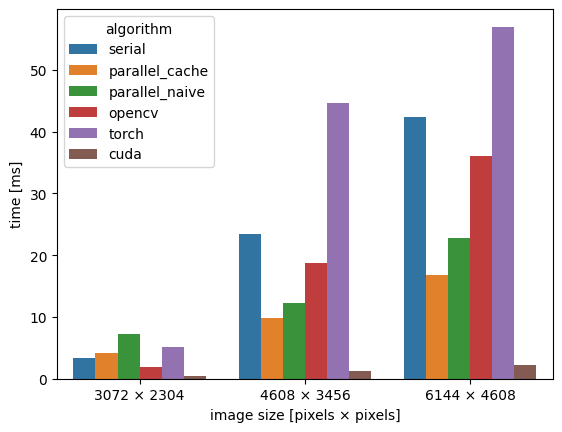

In [2]:
image_height = 576
image_width = 768

df = pd.read_csv("../results/benchmark.csv")
df["image_size"] = [f"{image_width * s:.0f} × {image_height * s:.0f}" for s in df["scale"]]

ax = sns.barplot(df, x="image_size", y="min_time", hue="algorithm")
ax.set_xlabel("image size [pixels × pixels]")
ax.set_ylabel("time [ms]");

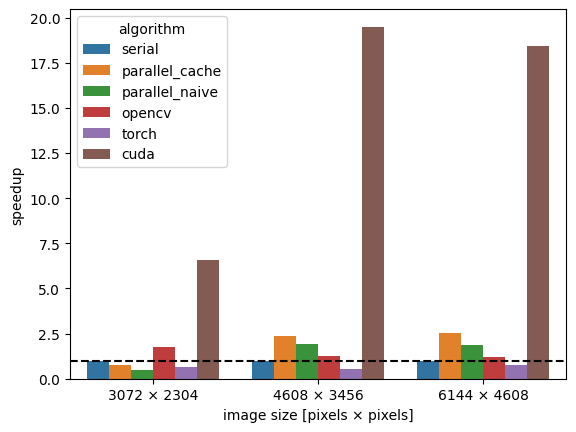

In [ ]:
def calc_speedup(x: pd.DataFrame) -> pd.DataFrame:
    baseline = x[x["algorithm"] == "serial"].min_time
    x["speedup"] = baseline.item() / x["min_time"]

    return x


df_speedup = df.groupby(["scale"], as_index=False).apply(calc_speedup, include_groups=False).reset_index(drop=True)

ax = sns.barplot(df_speedup, x="image_size", y="speedup", hue="algorithm")
ax.axhline(1, color="black", linestyle="--", label="serial")
ax.set_xlabel("image size [pixels × pixels]")
ax.set_ylabel("speedup");

In [4]:
with pd.option_context("display.float_format", "{:0.1f}".format):
    display(df_speedup)

,algorithm,min_time,image_size,speedup
0,serial,3.3,3072 × 2304,1.0
1,parallel_cache,4.2,3072 × 2304,0.8
2,parallel_naive,7.2,3072 × 2304,0.5
3,opencv,1.9,3072 × 2304,1.7
4,torch,5.2,3072 × 2304,0.6
5,cuda,0.5,3072 × 2304,6.6
6,serial,23.4,4608 × 3456,1.0
7,parallel_cache,9.9,4608 × 3456,2.4
8,parallel_naive,12.3,4608 × 3456,1.9
9,opencv,18.7,4608 × 3456,1.3
